# Chart Patter Identifier


## Model Training

Download and extract the dataset

In [1]:
!gdown --id 1Sn8uXjQZAIh8ycxEi0ZcTxhxTN5_U-Rx


/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1Sn8uXjQZAIh8ycxEi0ZcTxhxTN5_U-Rx
To: /content/DATASET.zip
100% 3.20M/3.20M [00:00<00:00, 230MB/s]


In [2]:
!unzip DATASET.zip


Archive:  DATASET.zip
   creating: DATASET/
   creating: DATASET/train_set/
   creating: DATASET/train_set/Ascending_Triangle/
  inflating: DATASET/train_set/Ascending_Triangle/AT_01.jpg  
  inflating: DATASET/train_set/Ascending_Triangle/AT_02.jpg  
  inflating: DATASET/train_set/Ascending_Triangle/AT_03.jpg  
  inflating: DATASET/train_set/Ascending_Triangle/AT_04.jpg  
  inflating: DATASET/train_set/Ascending_Triangle/AT_05.jpg  
  inflating: DATASET/train_set/Ascending_Triangle/AT_06.jpg  
  inflating: DATASET/train_set/Ascending_Triangle/AT_07.jpg  
  inflating: DATASET/train_set/Ascending_Triangle/AT_08.jpg  
  inflating: DATASET/train_set/Ascending_Triangle/AT_09.jpg  
  inflating: DATASET/train_set/Ascending_Triangle/AT_10.jpg  
  inflating: DATASET/train_set/Ascending_Triangle/AT_11.jpg  
  inflating: DATASET/train_set/Ascending_Triangle/AT_12.jpg  
  inflating: DATASET/train_set/Ascending_Triangle/AT_13.jpg  
  inflating: DATASET/train_set/Ascending_Triangle/AT_14.jpg  
  inf

Verify that the data is there

In [3]:
from PIL import Image
from IPython.display import display

In [4]:
im = Image.open('DATASET/train_set/Ascending_Triangle/AT_01.jpg')

In [5]:
!pip install tensorboardcolab

  Preparing metadata (setup.py) ... done
  Created wheel for tensorboardcolab: filename=tensorboardcolab-0.0.22-py3-none-any.whl size=3834 sha256=eea2d593201b1f91f3788edec8e64ec40c9493f6dd8bd6d87fd09c934baf60c1
  Stored in directory: /root/.cache/pip/wheels/8d/ee/46/7fe2bbbf1edbcfeabfaf13962dcaadec1f631d11147fd9d34d
Successfully built tensorboardcolab


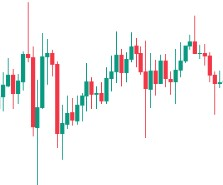

In [6]:
display(im)

In [7]:
import numpy as np
image_arr = np.array(im)
image_arr.shape
image_arr

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

## Module import and variable initialization


In [8]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorboardcolab import TensorBoardColab, TensorBoardColabCallback
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [9]:
# dimensions of our images.
img_width, img_height = 128, 128

In [10]:
train_data_dir = 'DATASET/train_set'
validation_data_dir = 'DATASET/val_set'
nb_train_samples = 140
nb_validation_samples = 70
epochs = 50
batch_size = 20

## Building the CNN model

In [11]:
#New Tensorflow model
input_shape = (img_width, img_height, 3)
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(32, (3, 3),activation='relu',input_shape=input_shape))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Conv2D(32, (3, 3),activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2)))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2)))

model.add(tf.keras.layers.Conv2D(64, (3, 3),activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2)))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(64,activation='relu'))


d2 = tf.keras.layers.Dense(64,activation='relu')
model.add(d2)

model.add(tf.keras.layers.Dropout(0.5))
d3 =  tf.keras.layers.Dense(7,activation='softmax')
model.add(d3)




In [12]:
model.compile(
    loss='categorical_crossentropy',
    optimizer='rmsprop',
    metrics=['accuracy']
)



In [13]:
weights = d3.get_weights()
weights[1].shape

(7,)

## Formatting data

In [14]:
# this is the data augmentation configuration we will use for training
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

In [15]:
# this is the augmentation configuration we will use for testing:
# only rescaling
test_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'
)

validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'
)

Found 210 images belonging to 7 classes.
Found 70 images belonging to 7 classes.


## Test the data feeders

In [16]:
datum = next(train_generator)
image_batch, label_batch = datum
image_batch.shape
k = 3
image = image_batch[k, ...]
label = label_batch[k, ...]

label

array([0., 0., 1., 0., 0., 0., 0.], dtype=float32)

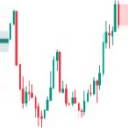

In [17]:
display(Image.fromarray((image * 255).astype(np.uint8)))

In [18]:
image_batch.shape

(20, 128, 128, 3)

## Train the model

In [20]:
# tbc = TensorBoardColab()
model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=nb_validation_samples // batch_size,
    callbacks = [tensorboard_callback]
)

<ipython-input-20-02639dcebc47>:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(


Epoch 1/50
7/7 [==============================] - 13s 220ms/step - loss: 2.0711 - accuracy: 0.1462 - val_loss: 1.9541 - val_accuracy: 0.1333
Epoch 2/50
7/7 [==============================] - 1s 198ms/step - loss: 1.9521 - accuracy: 0.1308 - val_loss: 1.9464 - val_accuracy: 0.1500
Epoch 3/50
7/7 [==============================] - 2s 248ms/step - loss: 1.9517 - accuracy: 0.1429 - val_loss: 1.9446 - val_accuracy: 0.1833
Epoch 4/50
7/7 [==============================] - 2s 352ms/step - loss: 1.9481 - accuracy: 0.1000 - val_loss: 1.9455 - val_accuracy: 0.1667
Epoch 5/50
7/7 [==============================] - 1s 171ms/step - loss: 1.9555 - accuracy: 0.1385 - val_loss: 1.9439 - val_accuracy: 0.1333
Epoch 6/50
7/7 [==============================] - 1s 140ms/step - loss: 1.9598 - accuracy: 0.1071 - val_loss: 1.9423 - val_accuracy: 0.1833
Epoch 7/50
7/7 [==============================] - 1s 134ms/step - loss: 1.9479 - accuracy: 0.2154 - val_loss: 1.9399 - val_accuracy: 0.1500
Epoch 8/50
7/7 [===

## Save the weights/Load the weights

In [21]:
#model.save_weights('model-1.h5')

In [33]:
model.load_weights('model-1.h5')

## Make predictions with the trained CNN!

In [42]:
from PIL import Image

In [47]:
im = Image.open('/content/DATASET/val_set/Ascending_Triangle/AT_21.jpg')

In [48]:
img = im.resize((128, 128))

In [49]:
img = np.array(img) / 255.

In [50]:
img.shape

(128, 128, 3)

In [51]:
img = img[np.newaxis, ...]

In [52]:
img.shape

(1, 128, 128, 3)

In [53]:
out = model.predict_on_batch(img)

In [54]:
out


array([[9.0315932e-01, 2.1343808e-04, 3.2638668e-04, 2.1272119e-02,
        1.2500857e-02, 9.3096793e-03, 5.3218249e-02]], dtype=float32)

In [55]:
np.sum(out)

1.0000001

In [56]:
np.argmax(out)

0